<a href="https://colab.research.google.com/github/joshdsolis/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/module3-gradient-descent/Gradient_Descent_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Descent Implementation Challenge!!

## Use gradient descent to find the optimal parameters of a **multiple** regression model. (We only showed an implementation for a bivariate model during lecture.)

A note: Implementing gradient descent in any context is not trivial, particularly the step where we calculate the gradient will change based on the number of parameters that we're trying to optimize for. You will need to research what the gradient of a multiple regression model looks like. This challenge is pretty open-ended but I hope it will be thrilling. Please work together, help each other, share resources and generally expand your understanding of gradient descent as you try and achieve this implementation. 

## Suggestions:

Start off with a model that has just two $X$ variables You can use any datasets that have at least two x variables. Potential candidates might be the blood pressure dataset that we used during lecture on Monday: [HERE](https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/mlr/excel/mlr02.xls) or any of the housing datasets. You would just need to select from them the two varaibles $x$ variables and one y variable that you want to work with that you most want to work with. 

Use Sklearn to find the optimal parameters of your model first. (like we did during the lecture.) So that you can compare the parameter estimates of your gradient-descent linear regression to the estimates of OLS linear regression. If implemented correctly they should be nearly identical.

Becoming a Data Scientist is all about striking out into the unknown, getting stuck and then researching and fighting and learning until you get yourself unstuck. Work together! And fight to take your own learning-rate fueled step towards your own optimal understanding of gradient descent! 


In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

from mpl_toolkits.mplot3d import Axes3D
##### Make it Hap'n Cap'n #####

df = pd.read_excel('https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/mlr/excel/mlr02.xls')
print(df.shape)
df.head()
df = (df-df.mean())/df.std()

*** No CODEPAGE record, no encoding_override: will use 'ascii'
(11, 3)


In [126]:
df.isna().sum()

X1    0
X2    0
X3    0
dtype: int64

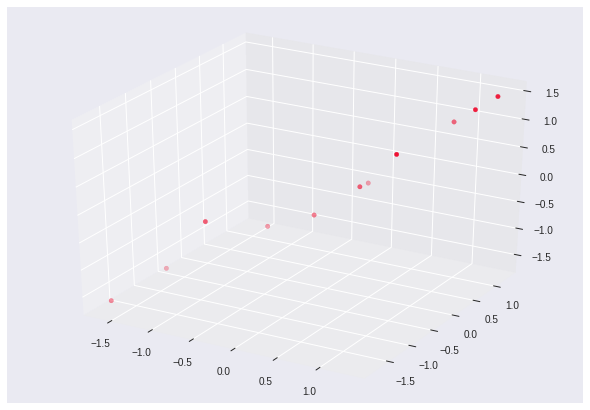

In [127]:
# Making arrays to scatter plot
x1 = df.X1.values
x2 = df.X2.values
x3 = df.X3.values

#Plotting now
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x1,x2,x3, color = '#ef1234');

In [0]:
# Setting up variables for cost function
m = len(x1)
x0 = np.ones(m)
X = np.array([x0, x1, x2]).T

B = np.array([0,0,0])
Y = np.array(x3)
alpha = 0.5

In [0]:
# Wrote cost function
def cost_function(X,Y,B):
  m = len(Y)
  J = np.sum((X.dot(B)-Y) **2 / (2*m))
  return J

In [130]:
# Looking at initial cost for df

initial_cost = cost_function(X,Y,B)
print(initial_cost)


0.4545454545454545


In [0]:
X_linalg = np.c_[np.ones(X.shape[0]), X] 


In [0]:
def gradient_descent(X, Y, B, alpha, iterations):
  cost_history = [0] * iterations
  m = len(Y)
  
  for iteration in range(iterations):
    # Hypothesis values
    h = X.dot(B)
    # Difference b/w Hypothesis and actual Y
    loss = h-Y
    # Gradient Calculation
    gradient = X.T.dot(loss)/m
    # Changing the values of B using gradient
    B = B - alpha*gradient
    # new cost value
    cost = cost_function(X,Y,B)
    cost_history[iteration] = cost
  
  return B, cost_history

In [133]:
final_theta = gradient_descent(X_linalg, Y, B, alpha, 100000)
print(final_theta)

ValueError: ignored

In [134]:
newB, cost_history = gradient_descent(X,Y,B,alpha,1000)

print(newB)
print(cost_history[-1])

[ 2.27091073e-16  1.05952105e+00 -9.08940436e-02]
0.026207373339585636


In [135]:
## Lets implement it and see how close GD comes to sklearn!
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Lets Implement it!!!

# First we'll calculate our parameters using sklearn to see how close our 
# Gradient Descent Method gets. 

# Fit Model
X = np.array([x1,x2]).T
Y = np.array(x3)

model = LinearRegression()
model = model.fit(X, Y)

Y_pred = model.predict(X)

# Assign coefficient and intercept to variables (beta_1, and beta_0)
beta_1 = model.coef_[0]
beta_2 = model.coef_[1]

beta_0 = model.intercept_

print("beta_2: ", beta_2)

print("beta_1: ", beta_1)
print("beta_0: ", beta_0)
print(model.coef_)
print(model.intercept_)

beta_2:  -0.09092818507867592
beta_1:  1.0595551885628705
beta_0:  2.2856418507871397e-16
[ 1.05955519 -0.09092819]
2.2856418507871397e-16


In [136]:
rmse = np.sqrt(mean_squared_error(Y, Y_pred))
r2 = model.score(X, Y)

print(rmse)
print(r2)

0.2289426710642102
0.9423437787025832


## Stretch Goals

If you happen upon the most useful resources for accomplishing this challenge first, I want you to spend time today studying other variations of Gradient Descent-Based Optimizers.

- Try and write a function that can perform gradient descent for arbitarily large (in dimensionality) multiple regression models. 
- Create a notebook for yourself exploring these topics
- How do they differ from the "vanilla" gradient descent we explored today
- How do these different gradient descent-based optimizers seek to overcome the challenge of finding the global minimum among various local minima?
- Write a blog post that reteaches what you have learned about these other gradient descent-based optimizers.

[Overview of GD-based optimizers](http://ruder.io/optimizing-gradient-descent/)

[Siraj Raval - Evolution of Gradient Descent-Based Optimizers](https://youtu.be/nhqo0u1a6fw)